In [44]:
!pip install sk-video

In [0]:
import skvideo.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
from numba import prange
import plotly.express as px
from sklearn.cluster import KMeans
import warnings 
from scipy import stats

warnings.filterwarnings("ignore")

In [46]:
video = skvideo.io.vread("/content/videoplayback.mp4")  
print(video.shape)

(1682, 360, 640, 3)


In [47]:
background = video[0].copy()
background.shape

(360, 640, 3)

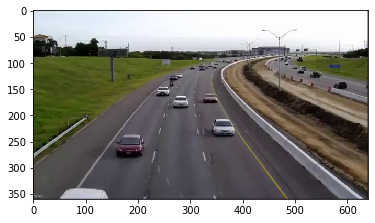

In [48]:
plt.imshow(background)
plt.show()

In [0]:
#Get random frames to speed up process
n_frames = 20
frames_idx = []
for i in range(0, n_frames):
  frames_idx.append(random.randint(0, video.shape[0]))

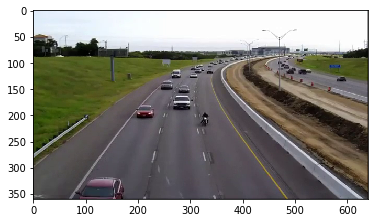

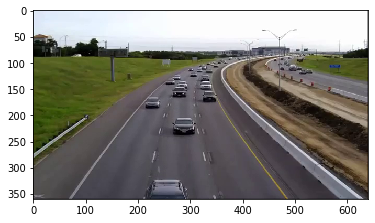

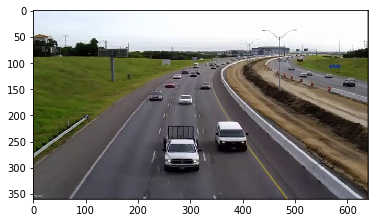

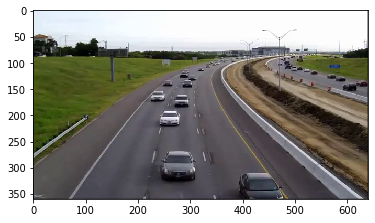

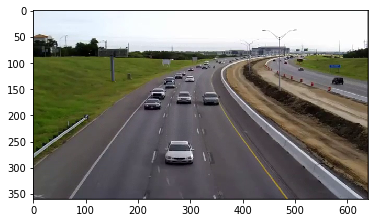

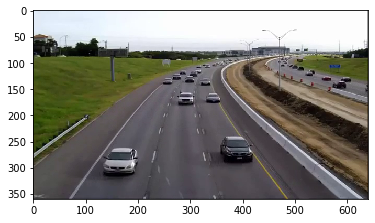

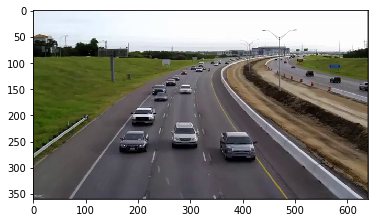

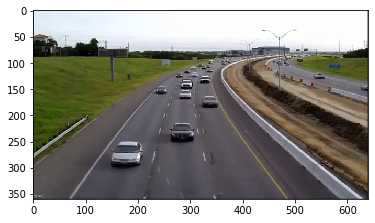

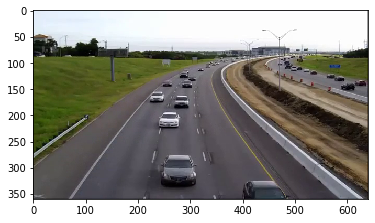

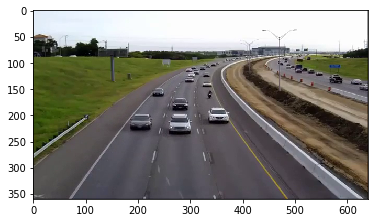

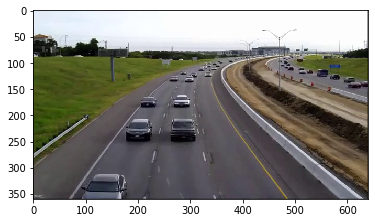

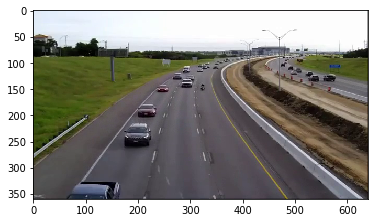

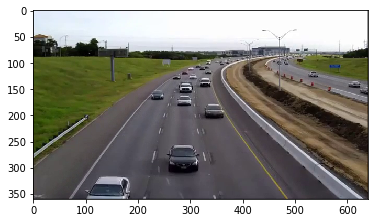

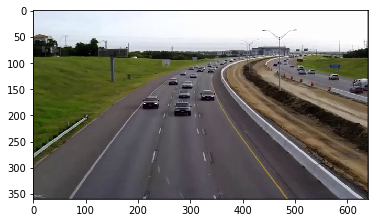

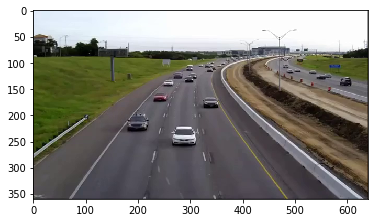

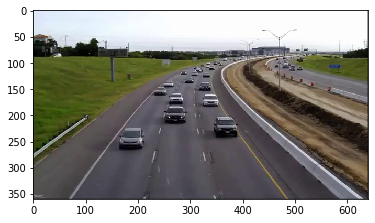

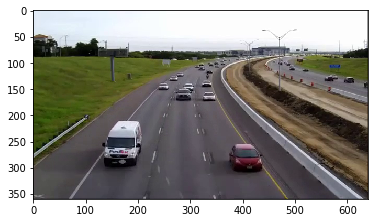

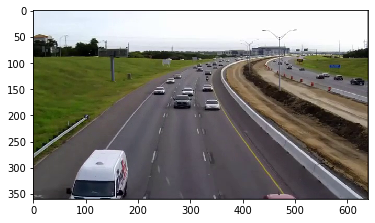

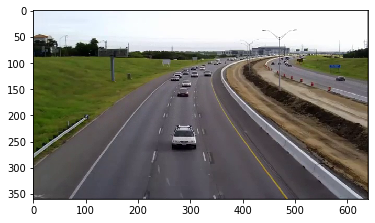

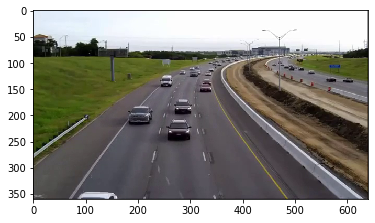

In [50]:
for frame in frames_idx:
  plt.imshow(video[frame])
  plt.show()

In [51]:
%%time
for x in prange(150, 220): #2
  for y in prange(220, 270):
    colors=[]
    for z in frames_idx:
      colors.append(video[z][y][x])
      colors_a = np.array(colors)
    ca = KMeans(n_clusters = 2)
    ca = ca.fit(colors)
    colors = len([colors[i] for i in np.where(np.array(ca.labels_))[0]])
    background_pixel = []
    background_pixel.append(np.median(colors_a[:,0]))
    background_pixel.append(np.median(colors_a[:,1]))
    background_pixel.append(np.median(colors_a[:,2]))
    background[y][x] = background_pixel

CPU times: user 1min 2s, sys: 185 ms, total: 1min 2s
Wall time: 1min 2s


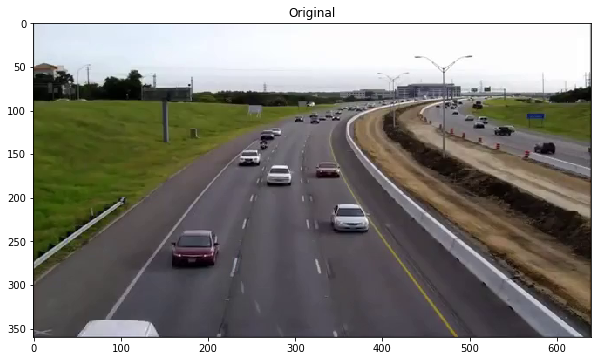

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(video[0])
plt.title("Original")
plt.show()

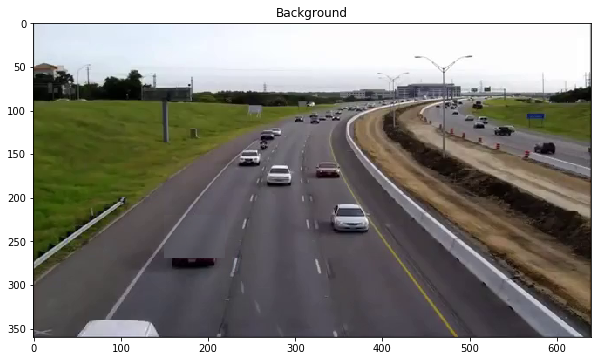

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.title("Background")
plt.show()

In [0]:
video = video.astype("int16")
background = background.astype("int16")

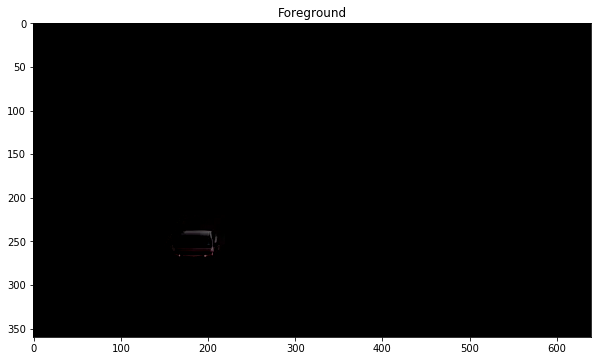

In [55]:
foreground = (video[0] - background)
np.clip(foreground, 0, 255, out=foreground)
plt.figure(figsize=(10,10))
plt.imshow(foreground)
plt.title("Foreground")
plt.show()

In [56]:
%%time
foreground = video.copy()
for i in range(0,foreground.shape[0]):
  foreground[i] = np.subtract(video[i], background)
  np.clip(foreground[i], 0, 255, out=foreground[i])
  foreground[i] = foreground[i].astype(np.uint8)

foreground = foreground.astype(np.uint8)
skvideo.io.vwrite("foreground.mp4", foreground)

KeyboardInterrupt: ignored

In [0]:
%%time
mask = foreground[0].copy()
for x in prange(0, mask.shape[1]):
  for y in prange(0, mask.shape[0]):
    if np.mean(mask[y][x]) > 1:
      mask[y][x] = [255,255,255]
plt.figure(figsize=(10,10))
plt.imshow(mask)
plt.title("Mask")
plt.show()

In [0]:
%%time
mask = foreground.copy()
for i in range(0, 1):
  for x in prange(0, mask.shape[2]):
    for y in prange(0, mask.shape[1]):
      if np.mean(mask[i][y][x]) > 1:
        mask[i][y][x] = [255,255,255]
      else:
        mask[i][y][x] = [0,0,0]
mask = mask.astype(np.uint8)
skvideo.io.vwrite("mask.mp4", mask)

In [0]:
pixel = pd.DataFrame(colors, columns=["R","G","B"])
pixel["label"] = ca.labels_
fig = px.scatter_3d(pixel, x = "R", y = "G", z = "B", color="label")
fig.show()